In [1]:
import pandas as pd
import math
import numpy as np
df=pd.read_excel('p1_data.xlsx')#这个会直接默认读取到这个Excel的第一个表单


In [2]:
green = df["CFActual (bar chart)"].values
black = df["CFConfig (Black line)"].values
print(len(green))
print(len(black))
print(green)
print(green)
'''
            i_n = i + 1
            i_p = i - 1
            while i_n < line_cnt:
                if not math.isnan(line[i_n]):
                    break
                i_n = i_n + 1
                
                
            while i_p > 0:
                if not math.isnan(line[i_p]):
                        break
                i_p = i_p - 1
'''

55448
55448
[  nan 1.545 2.391 ... 1.211 1.246   nan]
[  nan 1.545 2.391 ... 1.211 1.246   nan]


'\n            i_n = i + 1\n            i_p = i - 1\n            while i_n < line_cnt:\n                if not math.isnan(line[i_n]):\n                    break\n                i_n = i_n + 1\n                \n                \n            while i_p > 0:\n                if not math.isnan(line[i_p]):\n                        break\n                i_p = i_p - 1\n'

In [10]:
def imputation(line):
    line_cnt = len(line)
    query = []
    x_set = []
    y_set = []
    for i in range(line_cnt):
        if math.isnan(line[i]):
            query.append(i)
        else:
            x_set.append(i)
            y_set.append(line[i])

    res = np.interp(query, x_set, y_set)
    j = 0
    for i in res:
        line[query[j]] = i
        j = j + 1

    return line

def detect_outliers2(df):
    outlier_indices = []

    # 1st quartile (25%)
    Q1 = np.percentile(df, 25)
    print(Q1)
    # 3rd quartile (75%)
    Q3 = np.percentile(df, 75)
    print(Q3)
    # Interquartile range (IQR)
    IQR = Q3 - Q1

    # outlier step
    outlier_step = 1.5 * IQR
    delete_list = []
    for i in range(len(df)):
        if (df[i] < Q1 - outlier_step) | (df[i] > Q3 + outlier_step):
            delete_list.append(i)
    df = np.delete(df, delete_list)
    return df


In [11]:
green = imputation(green)
green = detect_outliers2(green)



0.343702380952381
0.9550000000000001


In [3]:
print(len(green))
print(green)

55448
[  nan 1.545 2.391 ... 1.211 1.246   nan]


In [5]:
import matplotlib.pyplot as plt

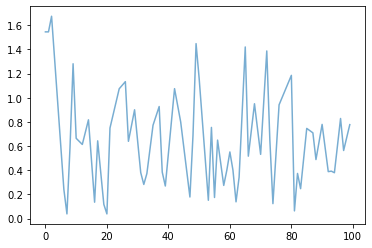

In [12]:
x = np.arange(len(green[:100]))
y = np.array(green[:100])
plt.plot(x, y, alpha=0.6)
plt.show()

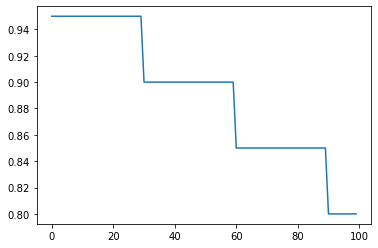

In [9]:
x = np.arange(len(black[:100]))
y = np.array(black[:100])
plt.plot(x, y)
plt.show()